In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Ted\Desktop\Juju\DEV\credit-risk-analysis\data\data.csv')

# Load variable definitions
variable_definitions = pd.read_csv(r'C:\Users\Ted\Desktop\Juju\DEV\credit-risk-analysis\data\Xente_Variable_Definitions.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display variable definitions
print("\nVariable definitions:")
variable_definitions

First few rows of the dataset:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [34]:
# Display the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [35]:
# Summary statistics for numerical features
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [36]:
# Initial Data Cleaning

# Convert TransactionStartTime to datetime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

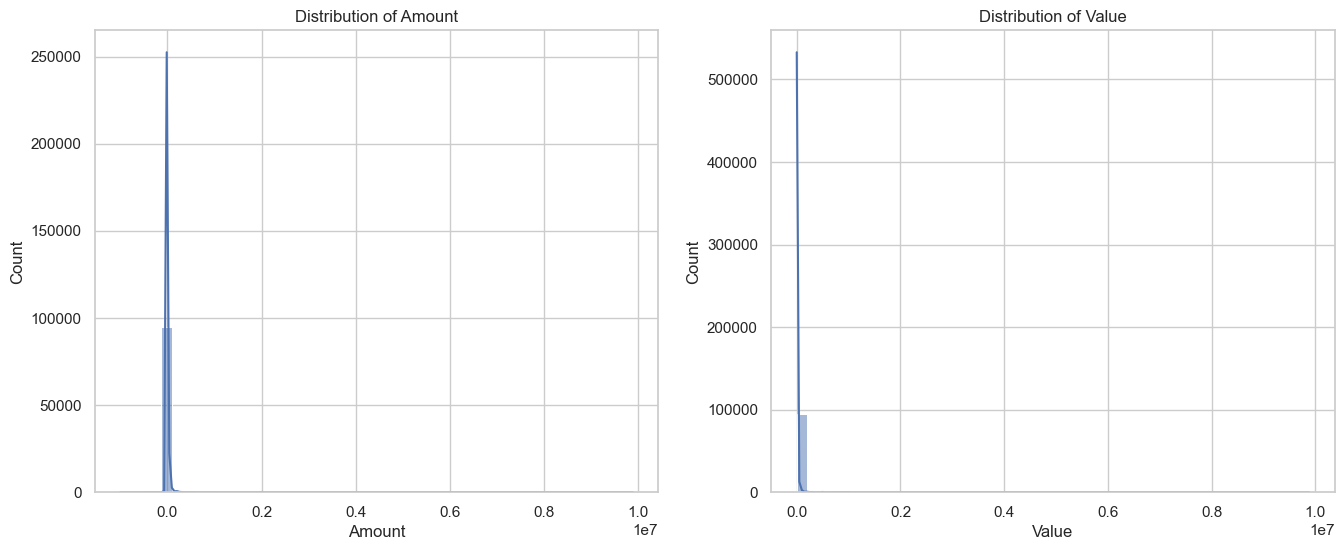

In [37]:
# Distribution of Numerical Features
# Set the style for the plots
sns.set(style="whitegrid")

# Plot distribution of Amount and Value
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data['Amount'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Amount')
sns.histplot(data['Value'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Value')

plt.show()


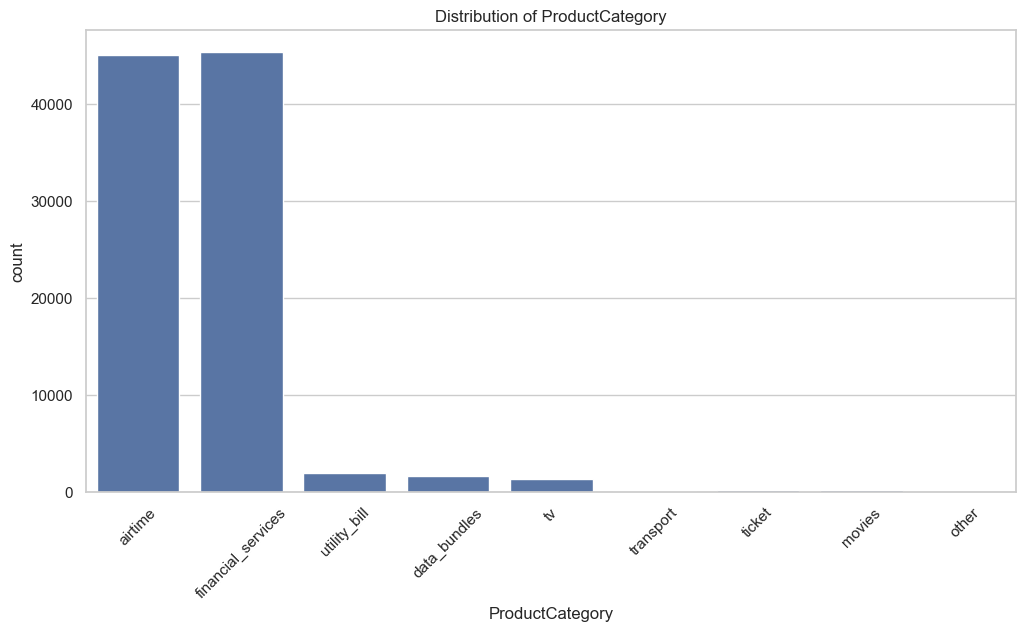

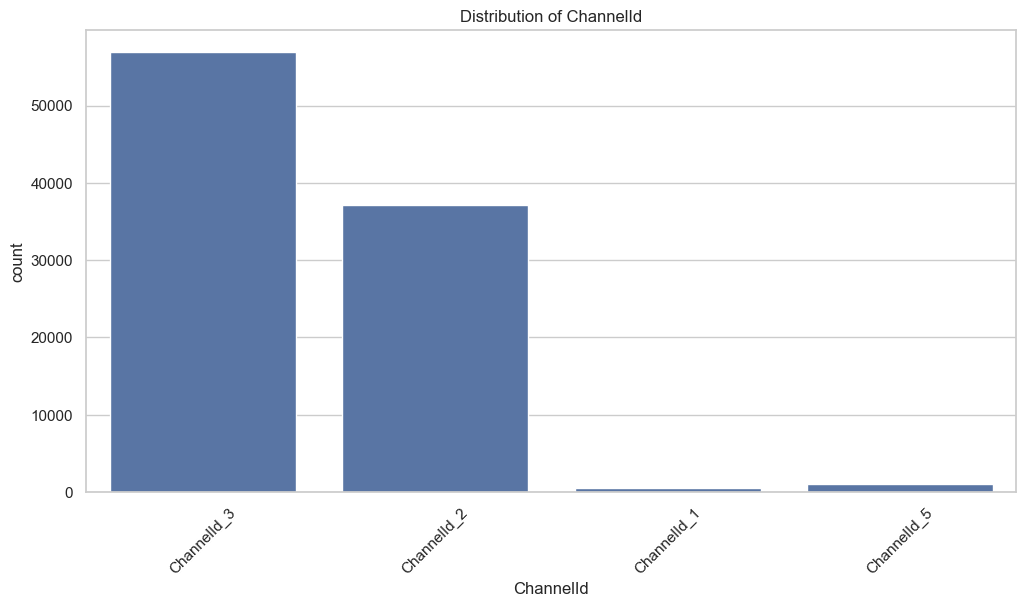

In [38]:
#Distribution of Categorical Features
# Plot distribution of ProductCategory
plt.figure(figsize=(12, 6))
sns.countplot(x='ProductCategory', data=data)
plt.title('Distribution of ProductCategory')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of ChannelId
plt.figure(figsize=(12, 6))
sns.countplot(x='ChannelId', data=data)
plt.title('Distribution of ChannelId')
plt.xticks(rotation=45)
plt.show()


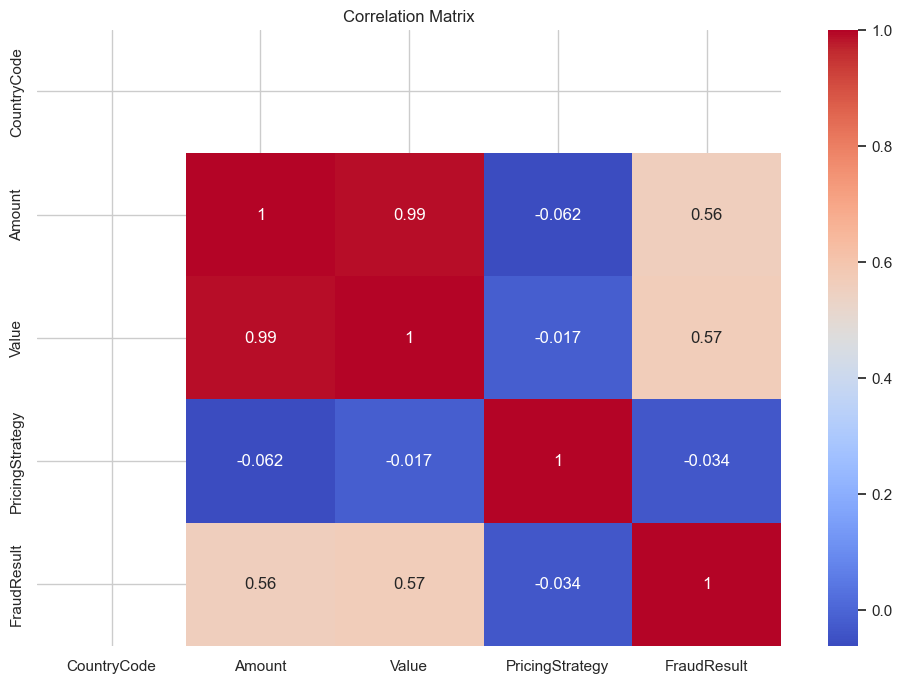

In [39]:
#Correlation Analysis
# Select only numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [40]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

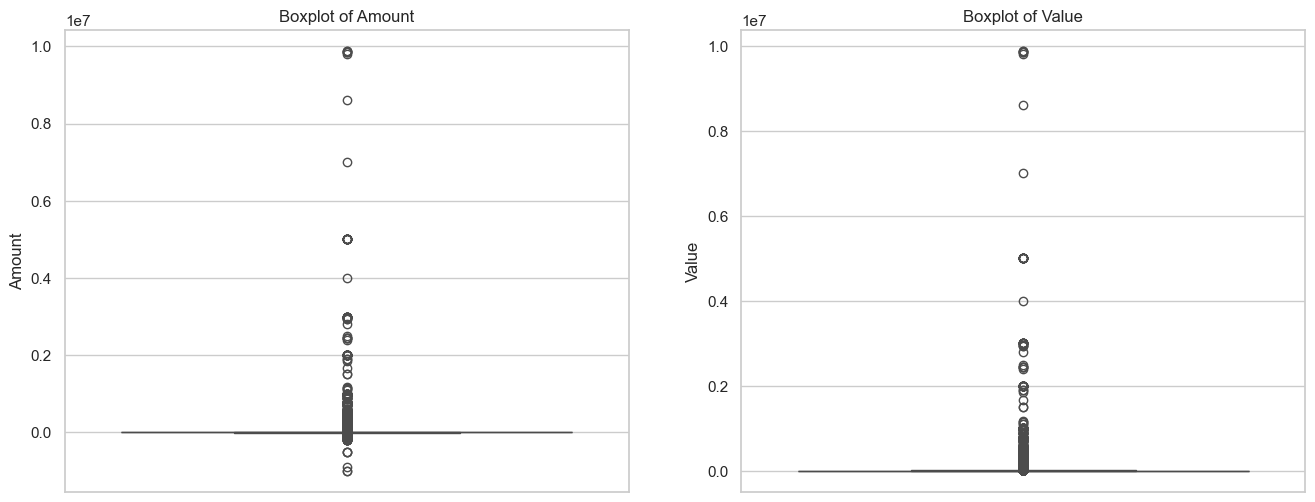

In [41]:
#Outlier Detection
# Plot boxplots for Amount and Value
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(y=data['Amount'], ax=ax[0])
ax[0].set_title('Boxplot of Amount')
sns.boxplot(y=data['Value'], ax=ax[1])
ax[1].set_title('Boxplot of Value')

plt.show()


In [42]:
# Exploratory Data Analysis (EDA)
# Distribution of the target variable (FraudResult)
fraud_distribution = data['FraudResult'].value_counts(normalize=True)
print("\nFraudResult distribution:")
print(fraud_distribution)


FraudResult distribution:
FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64


In [43]:
# Define proxy variable for risk
data['Risk'] = data['FraudResult'].apply(lambda x: 'High' if x == 1 else 'Low')


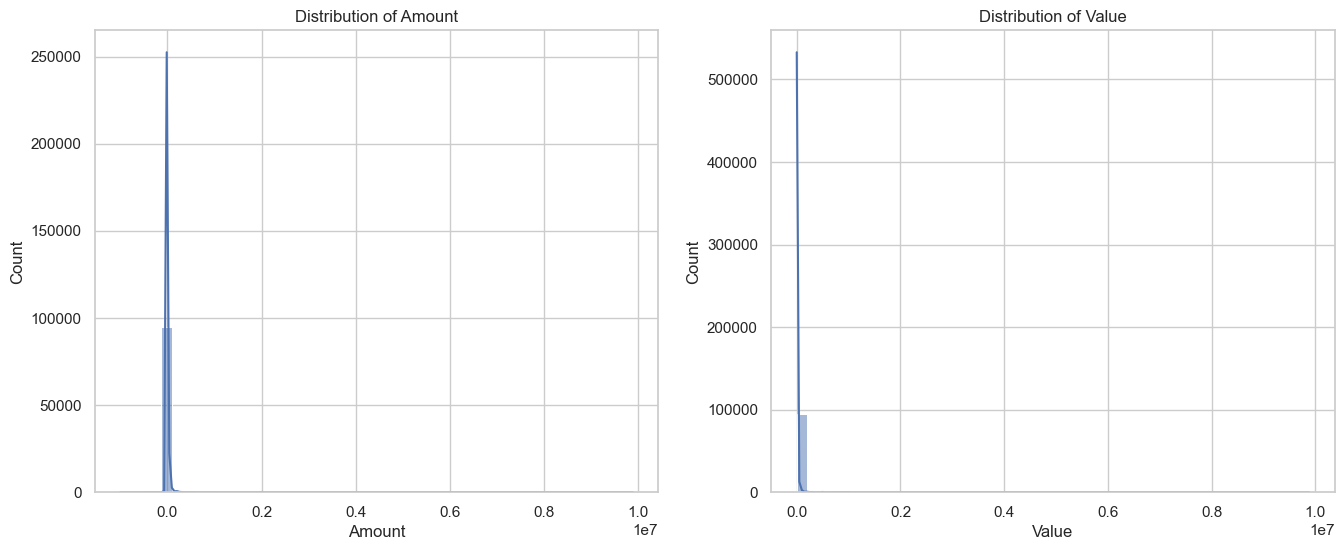

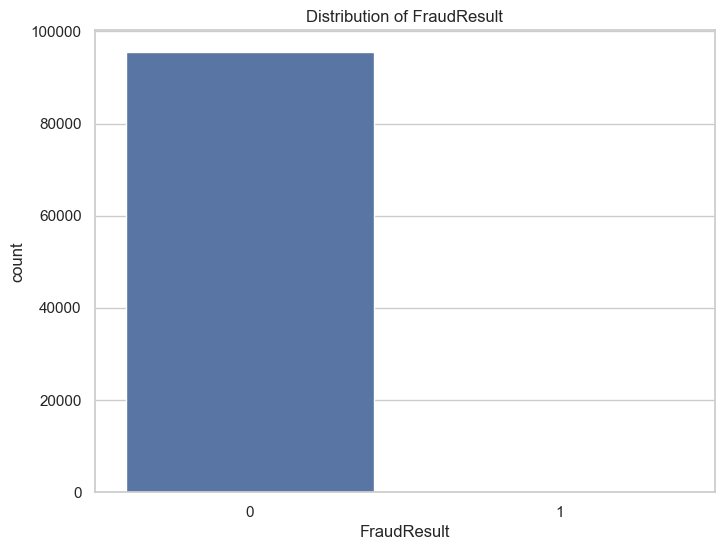

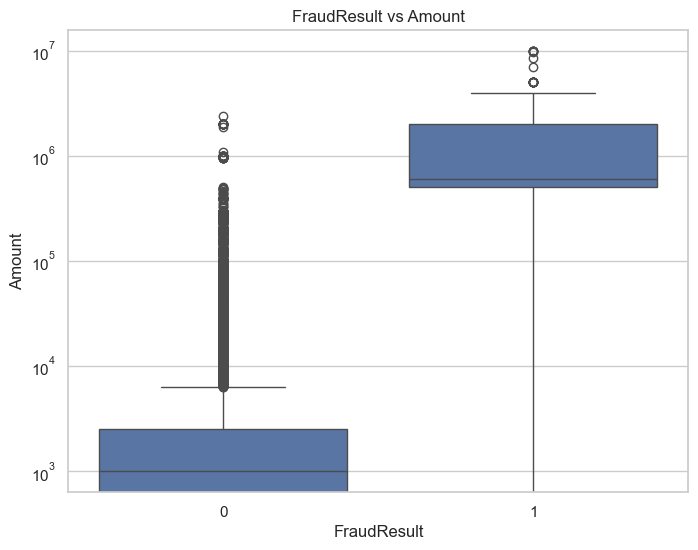

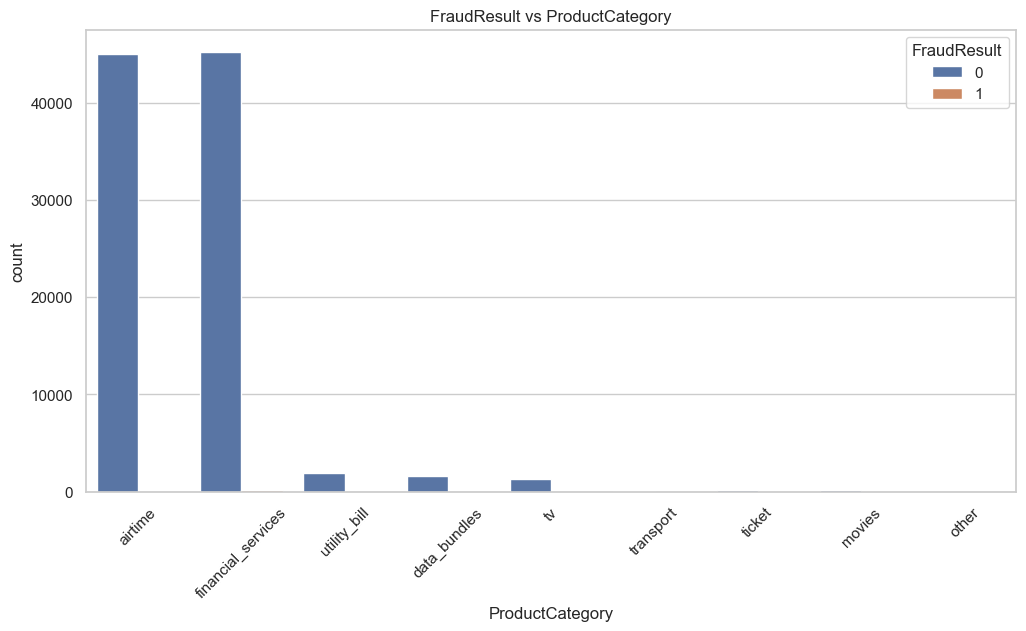

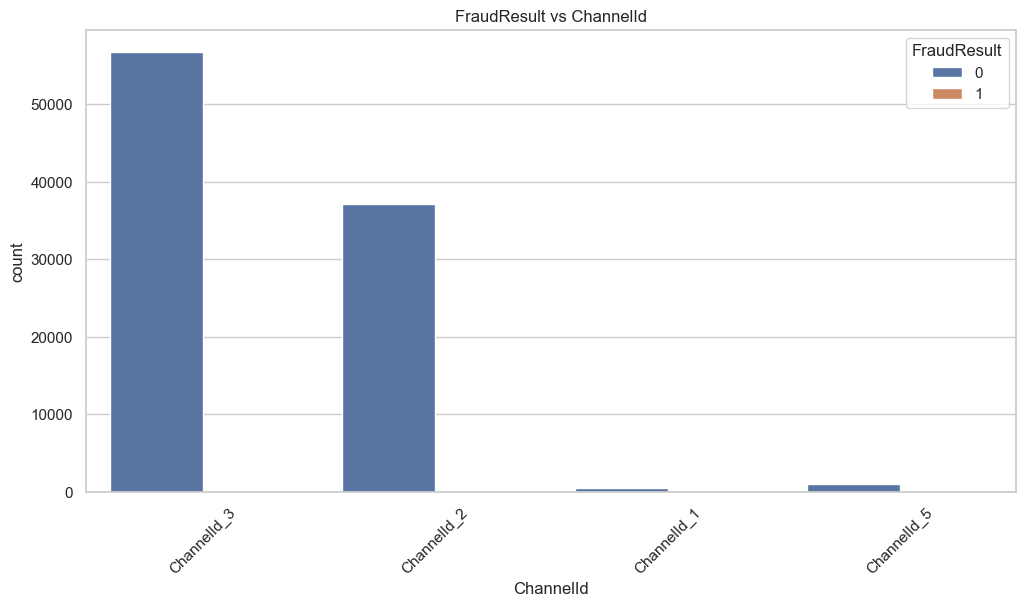

In [44]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot distribution of Amount and Value
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data['Amount'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Amount')
sns.histplot(data['Value'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Value')

plt.show()

# Plot FraudResult distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='FraudResult', data=data)
plt.title('Distribution of FraudResult')
plt.show()

# Plot FraudResult vs Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='FraudResult', y='Amount', data=data)
plt.title('FraudResult vs Amount')
plt.yscale('log')  # Use log scale due to the wide range of Amount values
plt.show()

# Plot FraudResult vs ProductCategory
plt.figure(figsize=(12, 6))
sns.countplot(x='ProductCategory', hue='FraudResult', data=data)
plt.title('FraudResult vs ProductCategory')
plt.xticks(rotation=45)
plt.show()

# Plot FraudResult vs ChannelId
plt.figure(figsize=(12, 6))
sns.countplot(x='ChannelId', hue='FraudResult', data=data)
plt.title('FraudResult vs ChannelId')
plt.xticks(rotation=45)
plt.show()